In [1]:
import tools._dataset_tools as dt
import tools._my_tools as mt
import cv2 as cv
import numpy as np
import os

### Convert to Grayscale

In [ ]:
# ToDo

### Image Cropping
All of the grayscale radar images from folder `datasets/dataset_full/` are taken and squares of size $96\times96$ are cropped from them with a stride of size $48$. The cropped squares are saved in `datasets/cropped_96_96/` in folder according to the square's coordinates.

In [ ]:
out_f = "datasets/cropped_96_96/"
in_f = "datasets/dataset_full/"

for f in range(55):
    os.mkdir(out_f+str(f).zfill(2))

In [ ]:
dt.cropFolder(in_f,out_f,96,48)

### Cleaning and Triplets Finding
All images from every folder of `datasets/cropped_96_96/` are taken, and images that have more than $95\%$ of the area without precipitation or have only precipitation of level $1$ (of $16$) are deleted. The previous images may also be removed so that there are in the end always left three consecutive images.

In [ ]:
in_f = "datasets/cropped_96_96/"
for folder in sorted(os.listdir(in_f)):
    dt.findSequence(in_f+folder+"/", 3)

### Loading to NumPy Array

Load all files in every folder to X, y numpy arrays by folders. Rotations are performed.

In [7]:
in_f = "datasets/cropped_96_96/"
folders = sorted(os.listdir(in_f))
X_sum = 0
# -------------------------------------------------------
for i in range(0,55):
    print("Processing folder", in_f, folders[i])
    
    X_tmp,y_tmp = dt.loadToNPA(in_f+folders[i]+"/")
    X_tmp = np.rot90(X_tmp,k=i%4,axes=(2,3))          # rotate the image
    y_tmp = np.rot90(y_tmp,k=i%4,axes=(1,2))          # rotate the image. Axis (1,2) because there is no channel information in y_tmp yet.
    
    np.save("datasets/cropped_96_96/loaded/"+str(i)+"_X",X_tmp)
    np.save("datasets/cropped_96_96/loaded/"+str(i)+"_y",y_tmp)
    
    X_sum += X_tmp.shape[0]
    
    print("In folder:",X_tmp.shape[0],"\t\tTotal:",Xsum)

Processing folder datasets/cropped_96_96/ 00
In folder: 2947 		Total: 2947
Processing folder datasets/cropped_96_96/ 01
In folder: 3383 		Total: 6330
Processing folder datasets/cropped_96_96/ 02
In folder: 3516 		Total: 9846
Processing folder datasets/cropped_96_96/ 03
In folder: 3413 		Total: 13259
Processing folder datasets/cropped_96_96/ 04
In folder: 3405 		Total: 16664
Processing folder datasets/cropped_96_96/ 05
In folder: 3375 		Total: 20039
Processing folder datasets/cropped_96_96/ 06
In folder: 3422 		Total: 23461
Processing folder datasets/cropped_96_96/ 07
In folder: 3459 		Total: 26920
Processing folder datasets/cropped_96_96/ 08
In folder: 3239 		Total: 30159
Processing folder datasets/cropped_96_96/ 09
In folder: 2918 		Total: 33077
Processing folder datasets/cropped_96_96/ 10
In folder: 2734 		Total: 35811
Processing folder datasets/cropped_96_96/ 11
In folder: 3433 		Total: 39244
Processing folder datasets/cropped_96_96/ 12
In folder: 3788 		Total: 43032
Processing fold

### Concatenate NumPy Arrays

In [11]:
in_f = "datasets/cropped_96_96/loaded/"
X = np.load(in_f+"0_X.npy")
# -------------------------------------------------------
for i in range(1,55):
    X_tmp = np.load(in_f+str(i)+"_X.npy")
    X = np.concatenate((X,X_tmp),axis=0)
# -------------------------------------------------------
print("Final shape of X:",X.shape)
np.save("datasets/dataset_interpolation_96/full/X",X)

Final shape of X: (222034, 2, 96, 96)


In [12]:
in_f = "datasets/cropped_96_96/loaded/"
y = np.load(in_f+"0_y.npy")
# -------------------------------------------------------
for i in range(1,55):
    y_tmp = np.load(in_f+str(i)+"_y.npy")
    y = np.concatenate((y,y_tmp),axis=0)
y = np.expand_dims(y,1)                     # expand the dimensions so it fits with x
# -------------------------------------------------------
print("Final shape of y:",y.shape)
np.save("datasets/dataset_interpolation_96/full/y",y)

Final shape of y: (222034, 96, 96)


### Split the Dataset
The test data.

In [2]:
from sklearn.model_selection import train_test_split
# -------------------------------------------------------
in_f = "datasets/dataset_interpolation_96/full/"
out_f = "datasets/dataset_interpolation_96/"

X = np.load(in_f+"X.npy")
y = np.load(in_f+"y.npy")
print("check 1")
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print("check 2")
# -------------------------------------------------------
np.save(out_f+"X_train_tmp",X_train)
np.save(out_f+"y_train_tmp",y_train)
np.save(out_f+"X_test",X_test)
np.save(out_f+"y_test",y_test)

check 1
check 2


The validation data.

In [2]:
from sklearn.model_selection import train_test_split
# -------------------------------------------------------
in_f = "datasets/dataset_interpolation_96/"
out_f = "datasets/dataset_interpolation_96/"

X = np.load(in_f+"X_train_tmp.npy")
y = np.load(in_f+"y_train_tmp.npy")
print("check 1")
# -------------------------------------------------------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)
print("check 2")
# -------------------------------------------------------
np.save(out_f+"X_train",X_train)
np.save(out_f+"y_train",y_train)
np.save(out_f+"X_val",X_val)
np.save(out_f+"y_val",y_val)

check 1
check 2


================================================================

================================================================

================================================================
## Part 2: 3 images -> 3 images

In [4]:
in_f = "datasets/cropped_seq_6/"
source_f = "datasets/dataset_full/"

In [2]:
for f in range(55):
    os.mkdir(in_f+str(f).zfill(2))

Crop $96\times 96$ patches.

In [4]:
dt.cropFolder(source_f,in_f,96,48)

Remove images with no information and group them to sequences of $6$ consecutive images.

In [5]:
for folder in sorted(os.listdir(in_f)):
    dt.findSequence(in_f+folder+"/", 6)

In folder "datasets/cropped_seq_6/00/" where left 8280 images.
In folder "datasets/cropped_seq_6/01/" where left 9642 images.
In folder "datasets/cropped_seq_6/02/" where left 9906 images.
In folder "datasets/cropped_seq_6/03/" where left 9642 images.
In folder "datasets/cropped_seq_6/04/" where left 9582 images.
In folder "datasets/cropped_seq_6/05/" where left 9600 images.
In folder "datasets/cropped_seq_6/06/" where left 9684 images.
In folder "datasets/cropped_seq_6/07/" where left 9822 images.
In folder "datasets/cropped_seq_6/08/" where left 9150 images.
In folder "datasets/cropped_seq_6/09/" where left 8202 images.
In folder "datasets/cropped_seq_6/10/" where left 7692 images.
In folder "datasets/cropped_seq_6/11/" where left 9816 images.
In folder "datasets/cropped_seq_6/12/" where left 10800 images.
In folder "datasets/cropped_seq_6/13/" where left 11154 images.
In folder "datasets/cropped_seq_6/14/" where left 10728 images.
In folder "datasets/cropped_seq_6/15/" where left 10

Load images from each folder in $\{00,01,\dots,54\}$ to a separate numpy arrays X and y.

In [8]:
folders = sorted(os.listdir(in_f))
X_sum = 0
# -------------------------------------------------------
for i in range(0,55):
    print("Processing folder", in_f, folders[i])
    
    X_tmp,y_tmp = dt.loadSeqToNPA(in_f+folders[i]+"/",3,3)
    X_tmp = np.rot90(X_tmp,k=i%4,axes=(2,3))     # rotate the image
    y_tmp = np.rot90(y_tmp,k=i%4,axes=(2,3))     # rotate the image
    
    np.save(in_f+"loaded/"+str(i)+"_X",X_tmp)
    np.save(in_f+"loaded/"+str(i)+"_y",y_tmp)
    
    X_sum += X_tmp.shape[0]
    
    print("In folder:",X_tmp.shape[0],"\t\tTotal:",X_sum)

Processing folder datasets/cropped_seq_6/ 00
In folder: 1380 		Total: 1380
Processing folder datasets/cropped_seq_6/ 01
In folder: 1607 		Total: 2987
Processing folder datasets/cropped_seq_6/ 02
In folder: 1651 		Total: 4638
Processing folder datasets/cropped_seq_6/ 03
In folder: 1607 		Total: 6245
Processing folder datasets/cropped_seq_6/ 04
In folder: 1597 		Total: 7842
Processing folder datasets/cropped_seq_6/ 05
In folder: 1600 		Total: 9442
Processing folder datasets/cropped_seq_6/ 06
In folder: 1614 		Total: 11056
Processing folder datasets/cropped_seq_6/ 07
In folder: 1637 		Total: 12693
Processing folder datasets/cropped_seq_6/ 08
In folder: 1525 		Total: 14218
Processing folder datasets/cropped_seq_6/ 09
In folder: 1367 		Total: 15585
Processing folder datasets/cropped_seq_6/ 10
In folder: 1282 		Total: 16867
Processing folder datasets/cropped_seq_6/ 11
In folder: 1636 		Total: 18503
Processing folder datasets/cropped_seq_6/ 12
In folder: 1800 		Total: 20303
Processing folder 

Concatenate the numpy arrays.

In [2]:
in_f = "datasets/cropped_seq_6/loaded/"
out_f = "datasets/dataset_extrapolation/full/"

In [3]:
X = dt.concatNPA(in_f,range(55),"_X.npy")
np.save(out_f+"X",X)

Final shape: (105647, 3, 96, 96)


In [3]:
y = dt.concatNPA(in_f, range(55),"_y.npy")
np.save(out_f+"y",y)

Final shape: (105647, 3, 96, 96)


Split the dataset

In [2]:
from sklearn.model_selection import train_test_split
out_f = "datasets/dataset_extrapolation/"

In [3]:
in_f = out_f+"full/"
# -------------------------------------------------------
X = np.load(in_f+"X.npy")
y = np.load(in_f+"y.npy")
print("check 1")
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print("check 2")
# -------------------------------------------------------
np.save(out_f+"X_train_tmp",X_train)
np.save(out_f+"y_train_tmp",y_train)
np.save(out_f+"X_test",X_test)
np.save(out_f+"y_test",y_test)

check 1
check 2


In [4]:
# X = np.load(out_f+"X_train_tmp.npy")
# y = np.load(out_f+"y_train_tmp.npy")
# print("check 1")
# # -------------------------------------------------------
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)
# print("check 2")
# -------------------------------------------------------
np.save(out_f+"X_train",X_train)
np.save(out_f+"y_train",y_train)
np.save(out_f+"X_val",X_val)
np.save(out_f+"y_val",y_val)

================================================================

================================================================

================================================================

In [6]:
name = "y_val"
in_f = "datasets/dataset_interpolation_96/"
out_f = "datasets/dataset_interpolation_96/tmp/"
y = np.load(in_f+ name + ".npy")
y = np.expand_dims(y,1)
print(y.shape)
np.save(out_f+name, y)

(35526, 1, 96, 96)


In [6]:
np.save("datasets/interpolation/X_train",Xtrain)
np.save("datasets/interpolation/y_train",ytrain)
np.save("datasets/interpolation/X_test",Xtest)
np.save("datasets/interpolation/y_test",ytest)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/interpolation/X_train.npy'

In [5]:
def rotateSave(in_f, l, name, suf):
    # -------------------------------------------------------
    for i in l:
        X_tmp = np.load(in_f+str(i)+name+suf)
#         X_tmp = np.rot90(X_tmp,k=4-i%4, axes=(1,2))
        X_tmp = np.rot90(X_tmp,k=i%4, axes=(2,3))
        np.save(in_f+str(i)+name, X_tmp)
    # -------------------------------------------------------
rotateSave(in_f+"loaded/", range(55), "_y", ".npy")

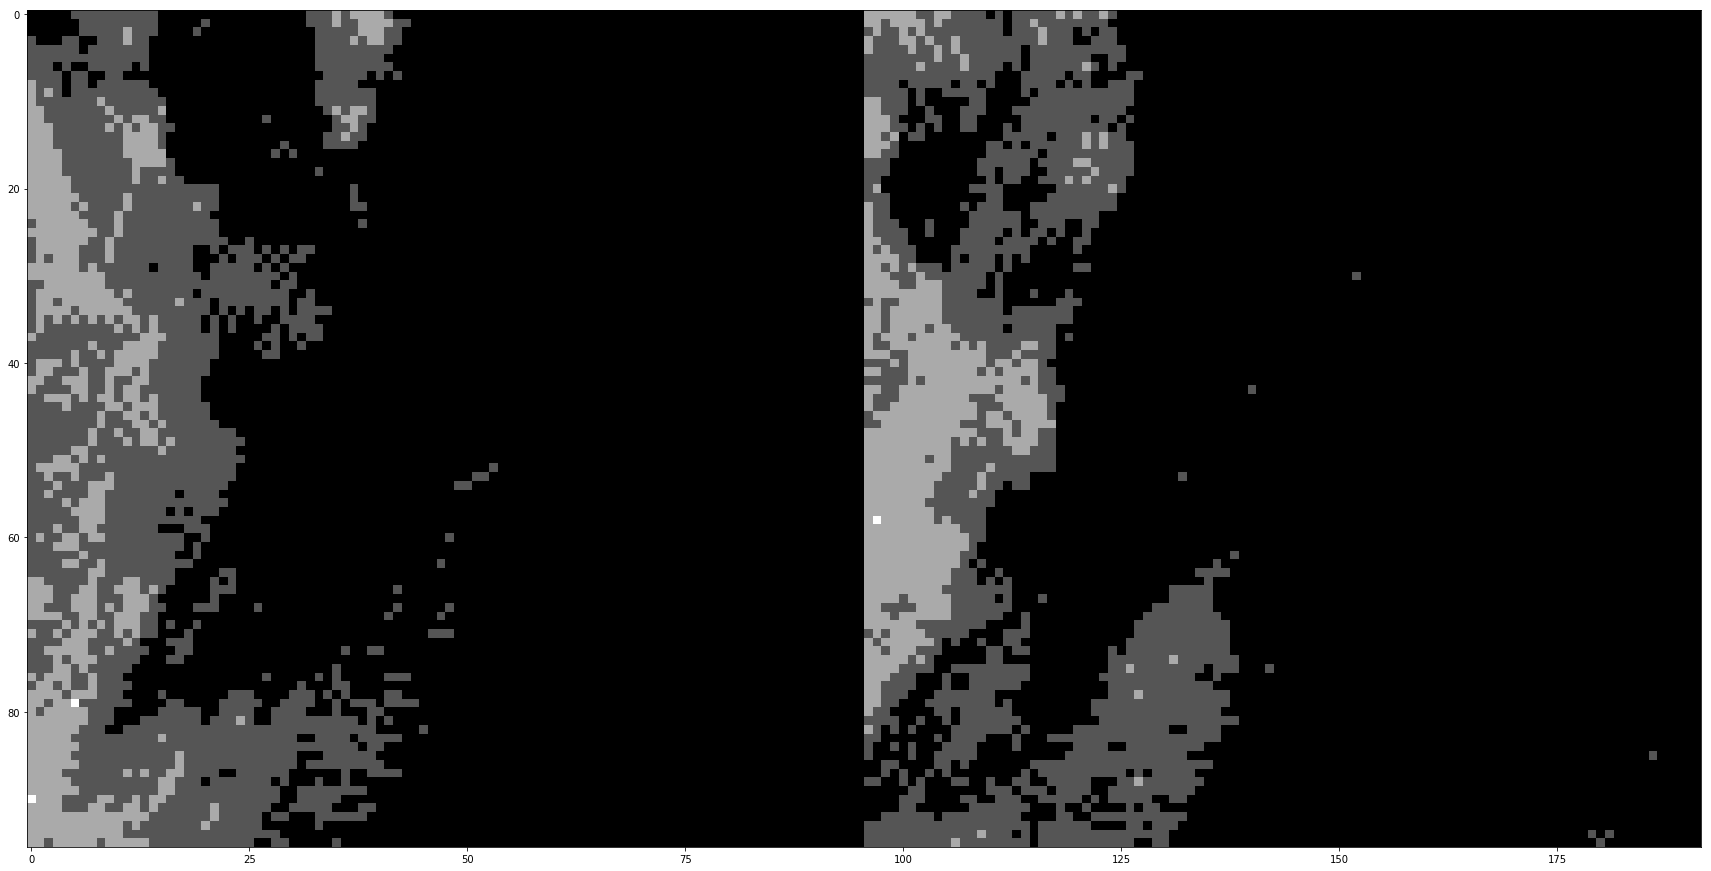

In [12]:
X = np.load(in_f+"loaded/"+"14_X.npy")
y = np.load(in_f+"loaded/"+"14_y.npy")
mt.showImgGC("",X[0,2,:,:],y[0,0,:,:])

### Making dataset smaller

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

Here goes the training part of dataset.

In [5]:
# Xtrain = np.load("datasets/dataset_interpolation_96/X_train.npy")
folder = "datasets/dataset_extrapolation/"
ytrain = np.load(folder+"y_train.npy")
print(ytrain.shape)
ytrain = np.load(folder+"y_val.npy")
print(ytrain.shape)
ytrain = np.load(folder+"y_test.npy")
print(ytrain.shape)

(67613, 3, 96, 96)
(16904, 3, 96, 96)
(21130, 3, 96, 96)


In [3]:
ytrain.shape

(149872, 96, 96)

In [5]:
Xtrain, Xtrash, ytrain, ytrash = train_test_split(Xtrain, ytrain, test_size=0.13, random_state=123)

In [7]:
np.save("datasets/dataset_interpolation_96/smaller/X_train",Xtrain)
np.save("datasets/dataset_interpolation_96/smaller/y_train",ytrain)

Here goes the test part of dataset.

In [4]:
# Xtest = np.load("datasets/dataset_interpolation_96/X_test.npy")
ytest = np.load("datasets/dataset_interpolation_96/y_test.npy")

In [5]:
ytest.shape

(49958, 96, 96)

In [5]:
Xtest, Xtrash, ytest, ytrash = train_test_split(Xtest, ytest, test_size=0.13, random_state=123)

In [7]:
np.save("datasets/dataset_interpolation_96/smaller/X_test",Xtest)
np.save("datasets/dataset_interpolation_96/smaller/y_test",ytest)